# Gaussian Approximation Application

## Introduction

### Heuristics

Consider a data set with zero mean, represented as $\{ x_{i} \}_{i = 1}^n$ where $n$ denotes the sample size. For a known normalizing coefficient $a_{i}$ our objective is to approximate the summation statistics $$X = \sum_{i =1 }^n a_{i} x_{i}$$ using Gaussian random variables $y_{i}$. In this context, we define $$Y = \sum_{i =1 }^n a_{i} y_{i}$$ with the goal that $Y$ retains a covariance structure approximately similar to that of $X$. To illustrate, consider the case where $a_{i} = 1/\sqrt{n}$. Here, the Central Limit Theorem (CLT) provides a basis for approximating $X$ with a Gaussian variable $Y$. The CLT suggests that as the sample size $n$ grows, the distribution of the sum (or average) of a large number of independent and identically distributed random variables, each with finite mean and variance, tends towards a Gaussian distribution. This principle allows for the approximation of the summation statistic $X$ in the context of large data sets.

Under specific conditions, we have the capability to construct a sequence of Gaussian Random Variables, denoted as $y_{i}$ , utilizing the estimated covariance structure of the dataset represented by $x_{n}.$This approach is fundamental for the statistical evaluation of summation statisticss $n$.The Gaussian approximation method facilitates the execution of statistical procedures on $X$ without necessitating the derivation of their asymptotic distribution. 

This methodological approach involves approximating the distribution of $X$ by generating a sufficiently large sample from the Gaussian sequence $Y$. Such a process is essential in estimating the critical value of the statistic $X$. By employing this technique, we can efficiently conduct statistical tests on $X$, even when its exact distribution is complex or undefined, thereby broadening the scope of statistical analysis.

## Change Point Detection Application

Change Point Detection focuses on the precise identification of abrupt and significant shifts in the behavior of a time series. While this problem has been extensively explored in academic research, it is predominantly approached as an applied mathematical problem rather than a statistical procedure. This approach is due to the complexity in deriving and approximating the asymptotic distribution of the statistics involved.

Lest consider the statistic $$T_i =    \left| \sum_{l = i - m }^{i}  x_{l,n} /\sqrt{m} -\sum_{l = i +1 }^{i + m +1}  x_{l,n} /\sqrt{m}\right|, $$ for some bandwidth parameters $m := m(n) $ determined by sample size $n$ and $ m+1 \leq i \leq n - m -1$.

The statistic $T_i$ is designed to compare the difference between the $m$-step mean before and after a specific time index $i$. This is achieved by calculating the mean of the $m$ data points preceding $i$ and contrasting it with the mean of the $m$ data points following $i$. The utility of $T_i$ lies in its sensitivity to abrupt changes in a time series. If there is a significant change at the time index $i$, it is expected that the value of $T_i$ will exhibit a pronounced peak at this point. To illustrate the effectiveness of $T_i$ in detecting such changes, we will employ a simulated dataset. This dataset will be constructed to include a deliberate, abrupt change at a known time index, allowing us to observe the corresponding response of $T_i$. 

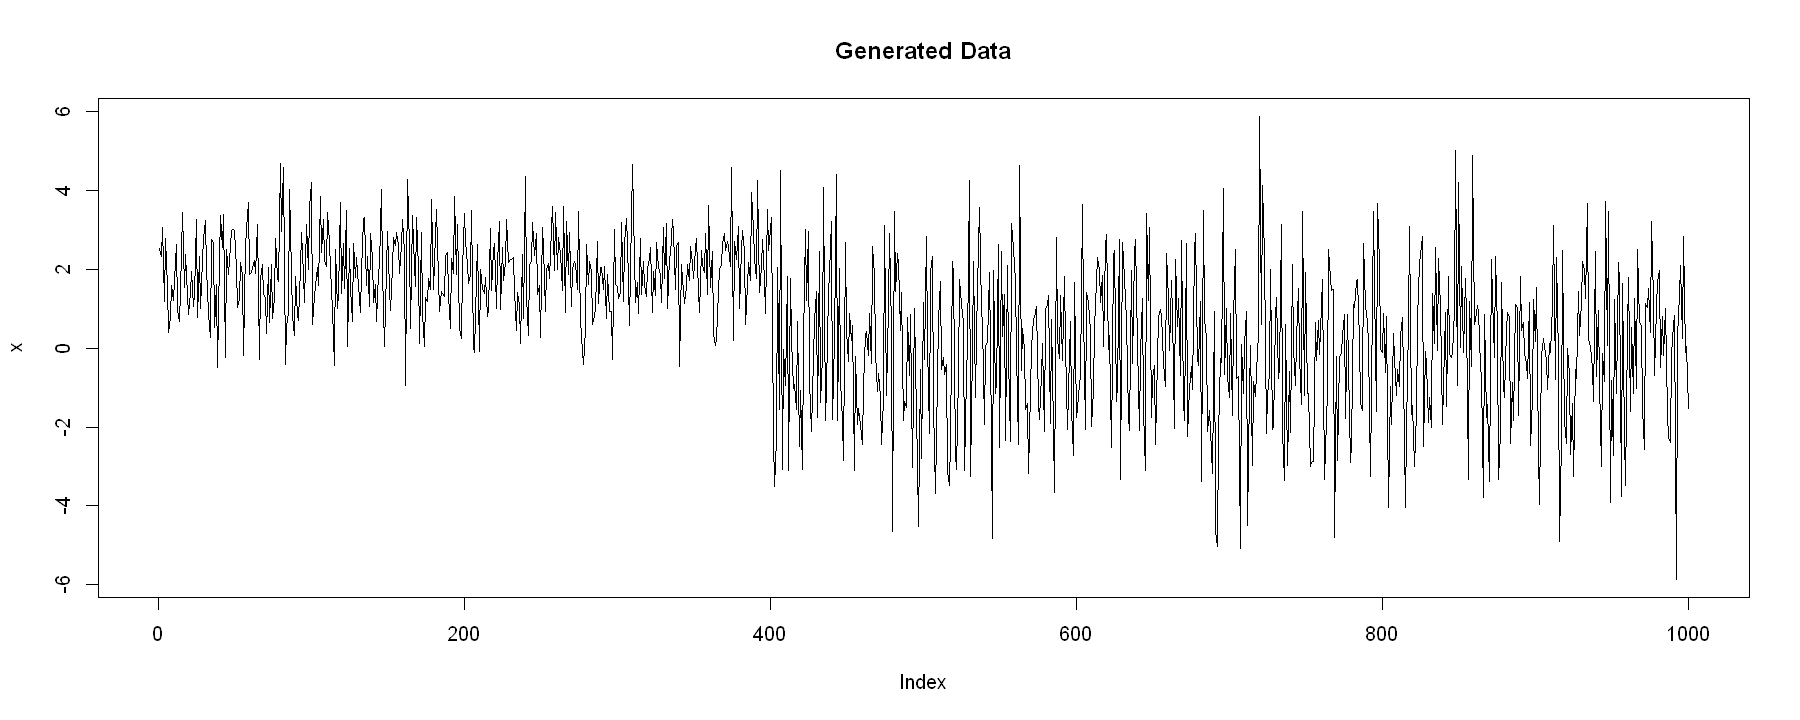

In [2]:
options(repr.plot.width = 15, repr.plot.height = 6)
# set sample size
n = 1000
# bandwith m for local mean comparison
m = floor(0.05*n)
# set change point location
cp= 400
# generate samples
x = c(rnorm(400,2,1), rnorm(600,0,2))
plot(x,type = 'l',main = "Generated Data")

Plot $T_i$ versus index $i$ for different lengths of bandwidth $m = 50$ and $m = 100$.  Note that the plot for $T_i$ peaks at $i = 400$. In the case where $m = 50$ there are multiple peaks past the index $i = 400$ due to increasing variance in the data. However, the effect of a large noise-to-signal ratio can be somewhat mitigated by increasing $m$. 

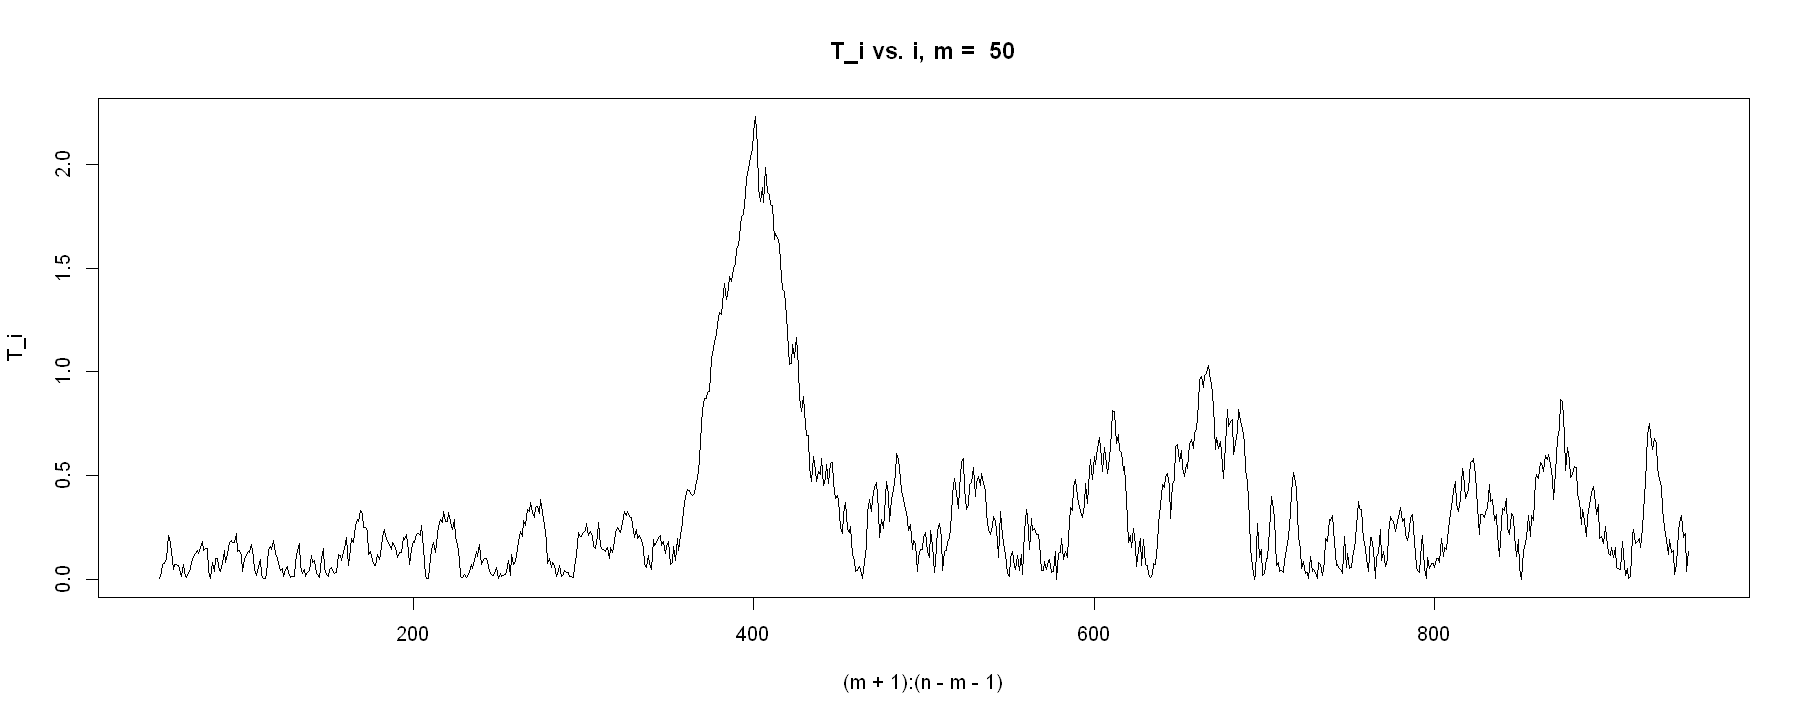

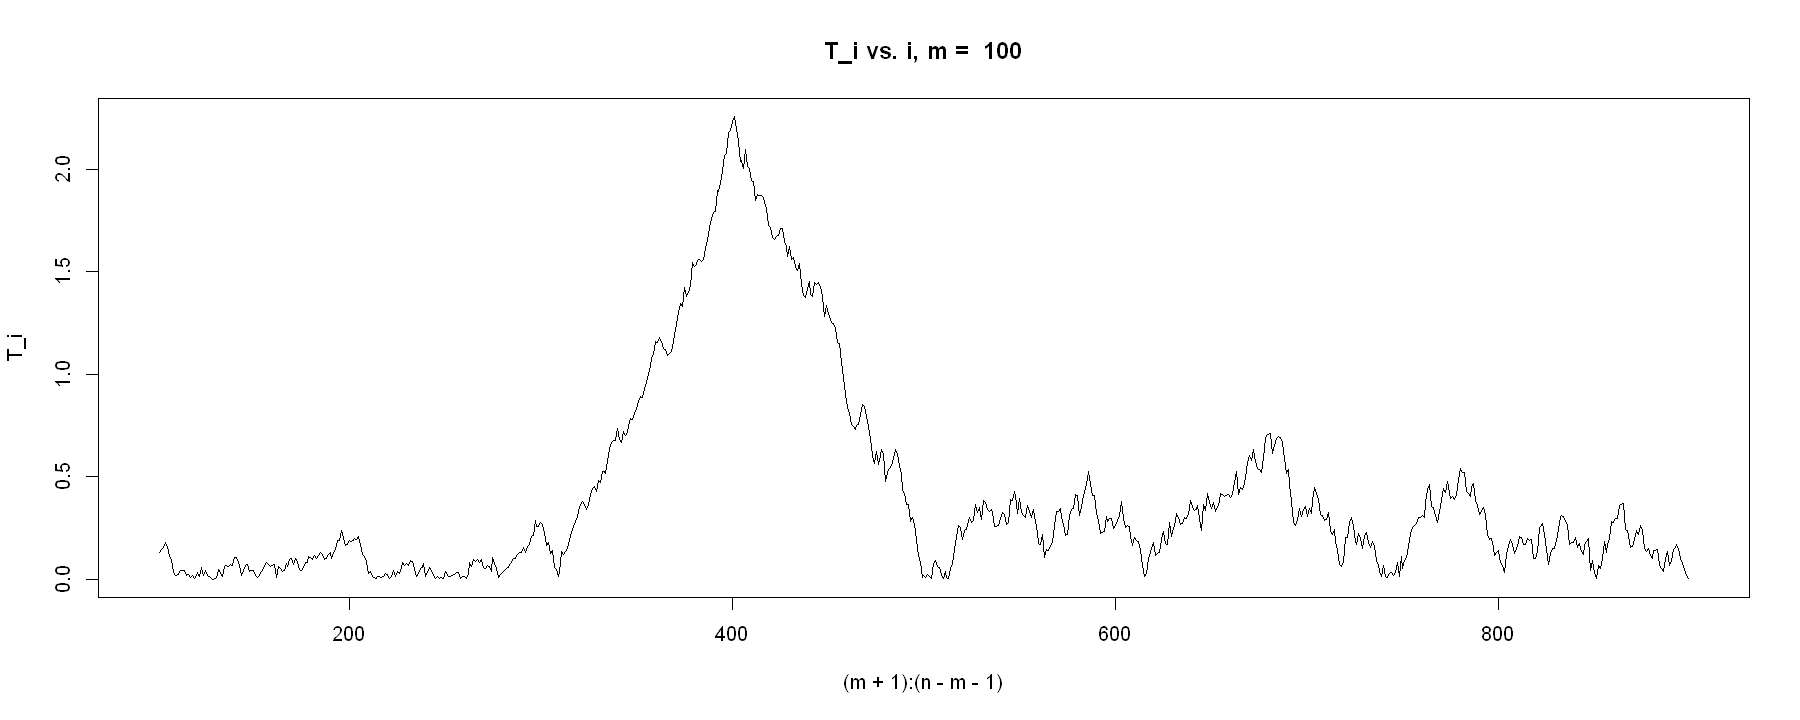

In [3]:
# compute T_i and plot wrt index i
T_i = rep(0,length((m+1):(n-m-1)))
for (i in (m+1):(n-m-1) ){ T_i[i-m] = abs( mean(x[(i-m):i]) - mean(x[(i+1):(i + m + 1)]) ) }
plot((m+1):(n-m-1),T_i,type = "l",main = paste("T_i vs. i, m = ",m) )
# repeat for larger m
m = floor(0.1*n)
T_i = rep(0,length((m+1):(n-m-1)))
for (i in (m+1):(n-m-1) ){ T_i[i-m] = abs( mean(x[(i-m):i]) - mean(x[(i+1):(i + m + 1)]) ) }
plot((m+1):(n-m-1),T_i,type = "l",main = paste("T_i vs. i, m = ",m) )

We can construct a statistical testing procedure for the null hypothesis that the mean for $x_i$ is constant vs. the alternative hypothesis that there exists at least one change point. That is 
$$H_0 : E[x_i] = \mu \quad vs. \quad H_a : \exists i, E[x_i] \neq E[x_{i+1}]$$
where $E$ is the expectation operator.

Let 
$$ T = \max_{m+1 \leq i \leq n - m -1} T_i .$$
Under the null hypothesis, the value of the statistic $T$ is typically much smaller compared to its value under the alternative hypothesis. This difference allows us to establish a rejection region for $T$ by comparing it to the critical value from its asymptotic distribution at a specific significance level, denoted as $\alpha$. The null hypothesis, $H_0$, is rejected if $T$ exceeds the critical value, $T_{critical,\alpha}$, which corresponds to the significance level $\alpha$.

Deriving the asymptotic distribution for the statistic $T$ in a practical, computable form is often challenging, especially in the context of widely-used autoregressive moving-average time series models. Consequently, we will employ a Gaussian approximation. This involves constructing a sequence of Gaussian random variables, represented by $y_i$, to ensure that the covariance structures of $X$ and $Y$ are approximately equivalent.

## Gaussian Approximation Procedure for Change Point Detection

### Theory

The statistic $T_i$ can be reformulated as the absolute value of  $X_{i} = \sum_{j =1 }^n a_{i,j} x_{j}$ where 
$$ a_{i,j}= \begin{cases} 
1/\sqrt{m} & if  \quad i - m \leq j \leq i \\ 
-1/\sqrt{m} & if \quad i + 1 \leq j \leq i + m \\
0 & otherwise.
\end{cases} $$
This reformulation enables the application of a Gaussian Approximation on $X = [X_1,\dots,X_n]^T$. We achieve this by constructing Gaussian variables $y_j$ such that $Y_{i} = \sum_{j =1 }^n a_{i,j} y_{j}$ approximate the distribution of $X$.

Another robust feature of Gaussian Approximation is its theoretical foundation, which accommodates high-dimensional procedures. Specifically, the theoretical framework accounts for the difference in distributions between $X$ and $Y$, adjusting for an increase in the number of variables relative to the sample size. This aspect ensures the method's applicability and accuracy in scenarios involving a large number of variables.

Denote $a_{j} =[a_{1,j},a_{2,j},\dots,a_{n,j}]^T $ then we have
$$ X = [X_1,X_2,\dots,X_n]^T = \sum_{j=1}^n a_j x_j, \quad \text{and} \quad T = \max_i |X_i| .$$

Let $G_i$ represent independent identically distributed (i.i.d.) standard Gaussian random variables. In this context, $\phi_i$ is specifically chosen as the Heteroscedasticity and Autocorrelation Consistent (HAC) estimator of the covariance matrix of $X$. By defining $\phi_i = \sum_{j = i - L}^{i + L} b_j x_j$ and setting $y_i = G_i \phi_i$, the summation $Y = \sum_{j= 1}^n a_j y_j$ effectively approximates the covariance structure of $X$, based on the observed data ${x_i}_{i=1}^n$. This approach ensures that the HAC estimator is utilized to accurately represent the covariance characteristics of $X$ through the covariance of $Y$.

### Procedure and Simulation Example

We will generate an AR(0.6) time series data set with a sample size of $n = 1000$, under the null hypothesis that the mean function remains constant. This context highlights the complexity of the distribution of the statistic $T$, even in a straightforward autoregressive model like this one.

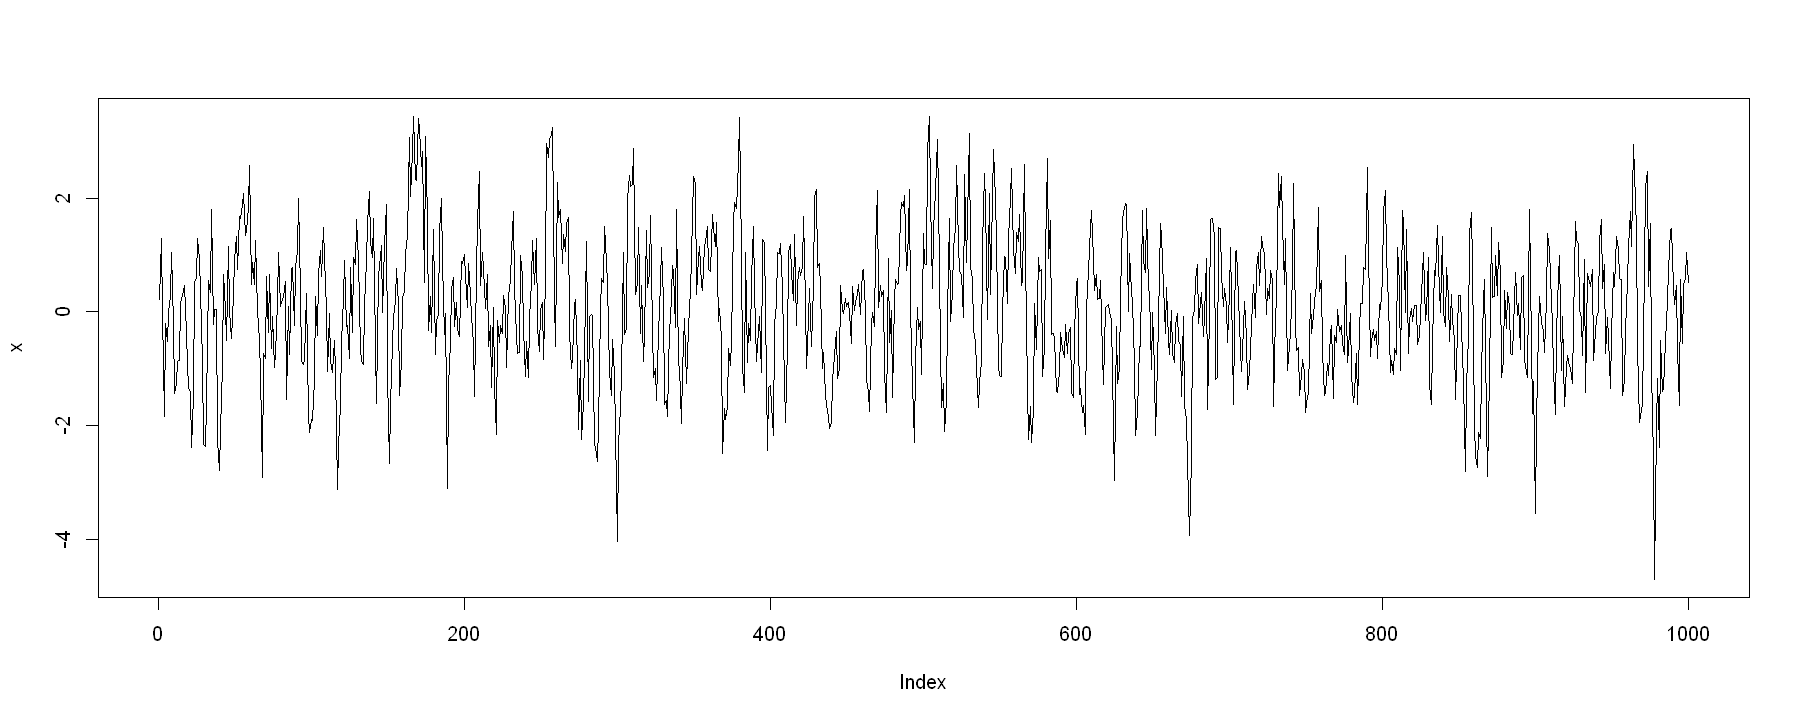

In [124]:
options(repr.plot.width = 15, repr.plot.height = 6)
# Function generates an AR(0.6) data of length n, no breakpoint
AR.6 <- function(n){
  t <- rep(0,n)
  e <- rnorm(n+1,0,1  )
  t[1] = e[1]
  for (i in 2:n)  t[i] = .6 * t[(i-1)] + e[i]
  t
}
n = 1000
x = AR.6(n)
plot(x,type = "l")

First compute $T_i$ and $\phi_i$ base on data set $\{x_i\}$.

In [125]:
# computing phi_i based on data set x
# L is local batch size used in covariance matrix estimation
L = 5
dif <- function(i,x,bw){ sum(x[(i-bw):i]) - sum(x[(i+1):(i+bw+1)] )}
phi =  sapply(seq(L+1,n-L-1,1),function(i) dif(i,x,L))
# set bandwidth m 
m = 40 
T = max(abs(sapply(seq(m+1,n-m-1,1),function(i) dif(i,x,m))/sqrt(2*m)))

Next, generate i.i.d. standard Gaussian for generating a random sample.
Compute simulated random sample statistic $T$ and estimated critical value of $T$ at significance level $\alpha = 0.05$.

In [126]:
# Gernerate iid Gaussian in one batch since sample size is relatively small.
# Repeat for k number of times for estimating critical value
k = 500
ly = (n - 2*L -1)
y = apply( matrix( rnorm(k *ly, 0,1), nrow = k ) ,1, function(g)  g*phi )
T_y = apply(y,2,function(y_i) max(abs( sapply(seq(m+1,ly-m-1), function(j) dif(j,y_i,m)))) )/(2*sqrt(m*L))
T_crit = quantile(T_y, 0.95)

Compare test statistics $T$ with $T_{critical,0.05}$, reject null hypthesis if $T > T_{critical,0.05}$.

In [127]:
paste(  "T = ", T )
paste(  "T_crit = ",  T_crit) 
paste(  "T  > T_crit = ", T  > T_crit)

[1] "T =  6.29327052977783"

[1] "T_crit =  8.60766882812223"

[1] "T  > T_crit =  FALSE"

Based on the comparison, we do not reject the null hypothesis. Consequently, we conclude that there are no breakpoints in the dataset.

### Example Alternative 

Let's generate a sample dataset under the alternative hypothesis by introducing a breakpoint into the data.

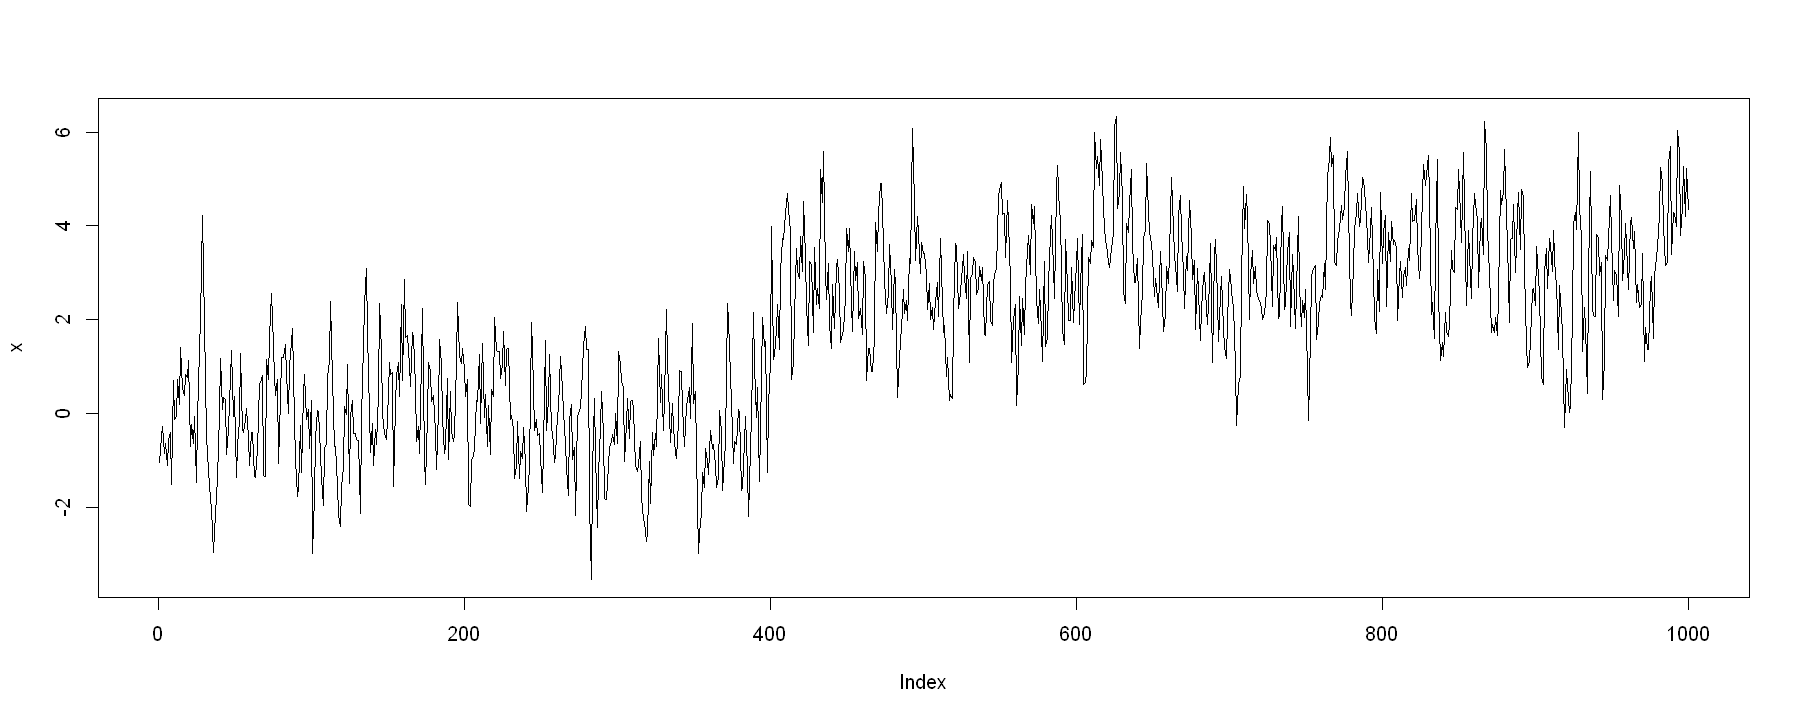

In [128]:
# generate data set x under alternative conditions
x = AR.6(n) + c(rep(0,400),rep(3,600))
plot(x,type = 'l')

In [129]:
L = 5
dif <- function(i,x,bw){ sum(x[(i-bw):i]) - sum(x[(i+1):(i+bw+1)] )}
phi =  sapply(seq(L+1,n-L-1,1),function(i) dif(i,x,L))
# set bandwidth m 
m = 40
T = max(abs(sapply(seq(m+1,n-m-1,1),function(i) dif(i,x,m))/sqrt(2*m)))
k = 500
ly = (n - 2*L -1)
y = apply( matrix( rnorm(k *ly, 0,1), nrow = k ) ,1, function(g)  g*phi )
T_y = apply(y,2,function(y_i) max(abs( sapply(seq(m+1,ly-m-1), function(j) dif(j,y_i,m)))) )/(2*sqrt(m*L))
T_crit = quantile(T_y, 0.95)  
paste(  "T = ", T )
paste(  "T_crit = ",  T_crit) 
paste(  "T  > T_crit = ", T  > T_crit)

[1] "T =  14.7651661292723"

[1] "T_crit =  8.18436132396013"

[1] "T  > T_crit =  TRUE"

The results indicate that the statistic $T$ exceeds $T_{critical,\alpha}$. Therefore, we reject the null hypothesis and conclude that there is at least one breakpoint in the data.

For detailed information on the theoretical proof of Gaussian Approximation and Data Analysis, you can refer to the publication "[Frequency Detection and Change Point Estimation for Time Series of Complex Oscillation](https://www.researchgate.net/publication/341175431_Frequency_Detection_and_Change_Point_Estimation_for_Time_Series_of_Complex_Oscillation)".
